___
<h3 style="text-align:center;">⚠️ Entrenamiento de <u>modelos</u> ⚠️
</h3>

---

<h3 style="text-align:center;">📚🔧
</h3>

In [18]:
# Importacion de Librerías:
import pandas as pd
import numpy as np

from sklearn.model_selection import RandomizedSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_curve, auc, silhouette_score, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler


import pickle
import yaml

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

---
**<h3 style="text-align:center;">📚🔧: División: <u>X_train</u> , <u>y_train</u> , <u>X_test</u> , <u>y_test</u></h3>**

**X_train + y_train:**

In [2]:
df_train = pd.read_csv('../data/train.csv', index_col='Unnamed: 0')

X_train = df_train.drop('Diagnosis', axis=1)
y_train = df_train['Diagnosis']

**X_test + y_test:**

In [3]:
df_test = pd.read_csv('../data/test.csv', index_col='Unnamed: 0')

X_test = df_test.drop('Diagnosis', axis=1)
y_test = df_test['Diagnosis']

**☑️ Check Dimensiones:**

In [5]:
# Forma de variables de entrenamiento y comevaluación:
print('Forma de X_train:', X_train.shape)
print('Forma de y_train:', y_train.shape)
print('Forma de X_test:', X_test.shape)
print('Forma de y_test:', y_test.shape)

Forma de X_train: (1125, 10)
Forma de y_train: (1125,)
Forma de X_test: (375, 10)
Forma de y_test: (375,)


---
**<h3 style="text-align:center;">🤖¹ : <u>DecisionTreeClassifier</u>🌳 +  <u>RandomizedSearchCV</u>🔀</h3>**

**🏋️‍♂️ Entrenamiento:**

In [50]:
modelo_dtc = DecisionTreeClassifier()


params_dtc = {
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'criterion': ['gini', 'entropy']
}

rs_dtc = RandomizedSearchCV(
    modelo_dtc, param_distributions=params_dtc,
    n_iter=50, scoring='recall', cv=5, random_state=42, n_jobs=-1
)

rs_dtc.fit(X_train, y_train)

print("Mejores parámetros:", rs_dtc.best_params_)
print("Mejor puntuación de validación:", rs_dtc.best_score_)

Mejores parámetros: {'min_samples_split': np.int64(2), 'min_samples_leaf': np.int64(7), 'max_depth': np.int64(15), 'criterion': 'entropy'}
Mejor puntuación de validación: 0.8168674698795181


**🔮 Predicciones:**

In [51]:
best_dtc = rs_dtc.best_estimator_

pred_dtc = best_dtc.predict(X_test)

df_predicciones_dtc = pd.DataFrame({'y_real': y_test,  
                                'y_pred': pred_dtc})

df_predicciones_dtc

,y_real,y_pred
1116,1,1
1368,1,1
422,0,0
413,0,0
451,0,0
...,...,...
155,1,1
1151,0,0
1141,0,0
974,0,1


**✔️ Evaluación:**

In [14]:
print('accuracy:',accuracy_score(y_test, pred_dtc))
print('recall:',recall_score(y_test,pred_dtc))
print('precission:', precision_score(y_test, pred_dtc))

print('\n----------------------------------------------\n')

print('confusion_matrix:\n',confusion_matrix(y_test, pred_dtc))

accuracy: 0.8826666666666667
recall: 0.795774647887324
precission: 0.8828125

----------------------------------------------

confusion_matrix:
 [[218  15]
 [ 29 113]]


In [15]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       233
           1       0.88      0.80      0.84       142

    accuracy                           0.88       375
   macro avg       0.88      0.87      0.87       375
weighted avg       0.88      0.88      0.88       375



**💾 Guardar Modelo + Config:**

In [16]:
with open('../models/DecisionTree_RandomizedSearchCV/model_DTCRSCV.pkl', 'wb') as archivo:
    pickle.dump(best_dtc, archivo)

In [17]:
configuracion = {
    'modelo': 'DecisionTreeClassifier',
    'mejores_parametros': rs_dtc.best_params_,
    'mejor_puntuacion': rs_dtc.best_score_,
    'configuracion_busqueda': {
        'n_iter': 50,
        'scoring': 'recall',
        'cv': 5,
        'random_state': 42
    }
}

with open('../models/DecisionTree_RandomizedSearchCV/config_DTCRSCV.yaml', 'w') as archivo:
    yaml.dump(configuracion, archivo)

---
**<h3 style="text-align:center;">🤖² : <u>RandomForestClassifier</u>🌳 +  <u>RandomizedSearchCV</u>🔀</h3>**

**🏋️‍♂️ Entrenamiento:**

In [53]:
modelo_rf = RandomForestClassifier()

params_rf = {
    'n_estimators': np.arange(25,75),
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'criterion': ['gini', 'entropy']
}

rs_rf = RandomizedSearchCV(
    modelo_rf, param_distributions=params_rf,
    n_iter=50, scoring='recall', cv=5, random_state=42, n_jobs=-1
)

rs_rf.fit(X_train, y_train)

print("Mejores parámetros:", rs_rf.best_params_)
print("Mejor puntuación de validación:", rs_rf.best_score_)

Mejores parámetros: {'n_estimators': np.int64(65), 'min_samples_split': np.int64(8), 'min_samples_leaf': np.int64(1), 'max_depth': np.int64(16), 'criterion': 'gini'}
Mejor puntuación de validación: 0.8433734939759037


**🔮 Predicciones:**

In [54]:
best_rf = rs_rf.best_estimator_

pred_rf = best_rf.predict(X_test)

df_predicciones_rf = pd.DataFrame({'y_real': y_test,  
                                'y_pred': pred_rf})

df_predicciones_rf

,y_real,y_pred
1116,1,1
1368,1,1
422,0,0
413,0,0
451,0,0
...,...,...
155,1,1
1151,0,0
1141,0,0
974,0,1


**✔️ Evaluación:**

In [10]:
print('accuracy:',accuracy_score(y_test, pred_rf))
print('recall:',recall_score(y_test, pred_rf))
print('precission:', precision_score(y_test, pred_rf))

print('\n----------------------------------------------\n')

print('confusion_matrix:\n',confusion_matrix(y_test, pred_rf))

accuracy: 0.9173333333333333
recall: 0.8591549295774648
precission: 0.9172932330827067

----------------------------------------------

confusion_matrix:
 [[222  11]
 [ 20 122]]


In [ ]:
print(classification_report(y_test, pred_rf))

**💾 Guardar Modelo + Config:**

In [18]:
with open('../models/RandomForest_RandomizedSearchCV/model_RFRSCV.pkl', 'wb') as archivo:
    pickle.dump(best_rf, archivo)

In [19]:
configuracion_rf = {
    'modelo': 'RandomForestClassifier',
    'mejores_parametros': rs_rf.best_params_,
    'mejor_puntuacion': rs_rf.best_score_,
    'configuracion_busqueda': {
        'n_iter': 50,
        'scoring': 'recall',
        'cv': 5,
        'random_state': 42
    }
}


with open('../models/RandomForest_RandomizedSearchCV/config_RFRSCV.yaml', 'w') as archivo:
    yaml.dump(configuracion, archivo)

---
**<h3 style="text-align:center;">🤖³ : <u>LogisticRegression</u> ↗️ + RandomizedSearchCV🔀 </h3>**

**🏋️‍♂️ Entrenamiento:**

In [22]:
modelo_lr = LogisticRegression(max_iter=500)

params_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga']
}

rs_lr = RandomizedSearchCV(
    modelo_lr, param_distributions=params_lr,
    n_iter=50, scoring='recall', cv=5, random_state=42, n_jobs=-1
)

rs_lr.fit(X_train, y_train)

print("Mejores parámetros:", rs_lr.best_params_)
print("Mejor puntuación de validación:", rs_lr.best_score_)

Mejores parámetros: {'solver': 'liblinear', 'penalty': 'l1', 'C': np.float64(545.5594781168514)}
Mejor puntuación de validación: 0.7903614457831326


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.du

**🔮 Predicciones:**

In [23]:
best_lr = rs_lr.best_estimator_

pred_lr = best_lr.predict(X_test)

df_predicciones_lr = pd.DataFrame({'y_real': y_test,  
                                'y_pred': pred_lr})

df_predicciones_lr

,y_real,y_pred
1116,1,1
1368,1,1
422,0,0
413,0,0
451,0,0
...,...,...
155,1,1
1151,0,0
1141,0,0
974,0,0


**✔️ Evaluación:**

In [24]:
print('accuracy:',accuracy_score(y_test, pred_lr))
print('recall:',recall_score(y_test, pred_lr))
print('precission:', precision_score(y_test, pred_lr))

print('\n----------------------------------------------\n')

print('confusion_matrix:\n',confusion_matrix(y_test, pred_lr))

accuracy: 0.9013333333333333
recall: 0.8309859154929577
precission: 0.9007633587786259

----------------------------------------------

confusion_matrix:
 [[220  13]
 [ 24 118]]


**💾 Guardar Modelo + Config:**

In [28]:
with open('../models/LogisticRegression_RandomizedSearchCV/model_LRRSCV.pkl', 'wb') as archivo:
    pickle.dump(best_lr, archivo)

In [25]:
configuracion_lr = {
    'modelo': 'LogisticRegression',
    'mejores_parametros': rs_lr.best_params_,
    'mejor_puntuacion': rs_lr.best_score_,
    'configuracion_busqueda': {
        'n_iter': 50,
        'scoring': 'recall',
        'cv': 5,
        'random_state': 42
    }
}

with open('../models/LogisticRegression_RandomizedSearchCV/config_LRRSCV.yaml', 'w') as archivo:
    yaml.dump(configuracion_lr, archivo)


---
**<h3 style="text-align:center;">🤖⁴ : SVC ↗️ + RandomizedSearchCV🔀 </h3>**

**🏋️‍♂️ Entrenamiento:**

In [17]:
modelo_svm = SVC()

params_svm = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1]
}

rs_svm = RandomizedSearchCV(
    modelo_svm, param_distributions=params_svm,
    n_iter=50, scoring='recall', cv=5, random_state=42, n_jobs=-1
)

rs_svm.fit(X_train, y_train)

print("Mejores parámetros:", rs_svm.best_params_)
print("Mejor puntuación de validación:", rs_svm.best_score_)

Mejores parámetros: {'kernel': 'rbf', 'gamma': 'scale', 'C': np.float64(1000.0)}
Mejor puntuación de validación: 0.8192771084337348


**🔮 Predicciones:**

In [18]:
best_svm = rs_svm.best_estimator_
pred_svm = best_svm.predict(X_test)

df_predicciones_svm = pd.DataFrame({'y_real': y_test, 'y_pred': pred_svm})

df_predicciones_svm

,y_real,y_pred
1116,1,1
1368,1,1
422,0,0
413,0,0
451,0,0
...,...,...
155,1,1
1151,0,0
1141,0,0
974,0,0


**✔️ Evaluación:**

In [19]:
print('accuracy:', accuracy_score(y_test, pred_svm))
print('recall:', recall_score(y_test, pred_svm))
print('precision:', precision_score(y_test, pred_svm))
print('\n----------------------------------------------\n')
print('confusion_matrix:\n', confusion_matrix(y_test, pred_svm))

accuracy: 0.896
recall: 0.8169014084507042
precision: 0.8992248062015504

----------------------------------------------

confusion_matrix:
 [[220  13]
 [ 26 116]]


In [20]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       233
           1       0.90      0.82      0.86       142

    accuracy                           0.90       375
   macro avg       0.90      0.88      0.89       375
weighted avg       0.90      0.90      0.89       375



**💾 Guardar Modelo + Config:**

In [38]:
with open('../models/SVM_RandomizedSearchCV/model_SVMRSCV.pkl', 'wb') as archivo:
    pickle.dump(best_svm, archivo)

In [21]:
configuracion_svm = {
    'modelo': 'SVM',
    'mejores_parametros': rs_svm.best_params_,
    'mejor_puntuacion': rs_svm.best_score_,
    'configuracion_busqueda': {
        'n_iter': 50,
        'scoring': 'recall',
        'cv': 5,
        'random_state': 42
    }
}

with open('../models/SVM_RandomizedSearchCV/config_SVMRSCV.yaml', 'w') as archivo:
    yaml.dump(configuracion_svm, archivo)

---
**<h3 style="text-align:center;">🤖⁵ : <u>XGBOOST</u> 🚀 + <u>RandomizedSearchCV</u>🔀</h3>**

**🏋️‍♂️ Entrenamiento:**

In [4]:
modelo_xgb = xgb.XGBClassifier(eval_metric='mlogloss')

params_xgb = {
    'max_depth': np.arange(3, 15),
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
    'n_estimators': np.arange(50, 200, 50),
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
    }

rs_xgb = RandomizedSearchCV(
    modelo_xgb, param_distributions=params_xgb,
    n_iter=50, scoring='recall', cv=5, random_state=42, n_jobs=-1, verbose= 2
)

rs_xgb.fit(X_train, y_train)


print("Mejores parámetros:", rs_xgb.best_params_)
print("Mejor puntuación de validación:", rs_xgb.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros: {'subsample': 1.0, 'n_estimators': np.int64(150), 'max_depth': np.int64(3), 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.7}
Mejor puntuación de validación: 0.8746987951807229


**🔮 Predicciones:**

In [5]:
best_xgb = rs_xgb.best_estimator_

pred_xgb = best_xgb.predict(X_test)

df_predicciones_xgb = pd.DataFrame({'y_real': y_test, 'y_pred': pred_xgb})

df_predicciones_xgb

,y_real,y_pred
1116,1,1
1368,1,1
422,0,0
413,0,0
451,0,0
...,...,...
155,1,1
1151,0,0
1141,0,0
974,0,0


**✔️ Evaluación:**


In [6]:
print('accuracy:', accuracy_score(y_test, pred_xgb))
print('recall:', recall_score(y_test, pred_xgb))
print('precission:', precision_score(y_test, pred_xgb))

print('\n----------------------------------------------\n')

print('confusion_matrix:\n', confusion_matrix(y_test, pred_xgb))

accuracy: 0.936
recall: 0.8943661971830986
precission: 0.9338235294117647

----------------------------------------------

confusion_matrix:
 [[224   9]
 [ 15 127]]


In [7]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       233
           1       0.93      0.89      0.91       142

    accuracy                           0.94       375
   macro avg       0.94      0.93      0.93       375
weighted avg       0.94      0.94      0.94       375



**💾 Guardar Modelo + Config:**


In [13]:
with open('../models/XGBoost_RandomizedSearchCV/model_XGBRSCV.pkl', 'wb') as archivo:
    pickle.dump(best_xgb, archivo)

In [15]:
configuracion = {
    'modelo': 'XGBoost',
    'mejores_parametros': rs_xgb.best_params_,
    'mejor_puntuacion': rs_xgb.best_score_,
    'configuracion_busqueda': {
        'n_iter': 50,
        'scoring': 'recall',
        'cv': 3,
        'random_state': 42
    }
}

with open('../models/XGBoost_RandomizedSearchCV/config_XGBRSCV.yaml', 'w') as archivo:
    yaml.dump(configuracion, archivo)

---
**<h3 style="text-align:center;">🤖⁶ : <u>PCA</u>🌀 + <u>KNN</u>📐</h3>**

🌌 **Reducción Dimensionalidad:**

In [27]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**🏋️‍♂️ Entrenamiento:**

In [30]:
modelo_knn = KNeighborsClassifier()

params_knn = {
    'n_neighbors': np.arange(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

rs_knn = RandomizedSearchCV(
    modelo_knn, param_distributions=params_knn,
    n_iter=50, scoring='recall', cv=5, random_state=42, n_jobs=-1, verbose = 3
)

rs_knn.fit(X_train_pca, y_train)

print("Mejores parámetros:", rs_knn.best_params_)
print("Mejor puntuación de validación:", rs_knn.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros: {'weights': 'uniform', 'n_neighbors': np.int64(1), 'metric': 'euclidean'}
Mejor puntuación de validación: 0.4385542168674699


**🔮 Predicciones:**


In [31]:
best_knn = rs_knn.best_estimator_

pred_knn = best_knn.predict(X_test_pca)

df_predicciones_knn = pd.DataFrame({'y_real': y_test, 'y_pred': pred_knn})

df_predicciones_knn

,y_real,y_pred
1116,1,0
1368,1,0
422,0,0
413,0,0
451,0,0
...,...,...
155,1,1
1151,0,0
1141,0,1
974,0,0


**✔️ Evaluación:**


In [32]:
print('accuracy:', accuracy_score(y_test, pred_knn))
print('recall:', recall_score(y_test, pred_knn))
print('precision:', precision_score(y_test, pred_knn))
print('\n----------------------------------------------\n')
print('confusion_matrix:\n', confusion_matrix(y_test, pred_knn))

accuracy: 0.6053333333333333
recall: 0.4507042253521127
precision: 0.47761194029850745

----------------------------------------------

confusion_matrix:
 [[163  70]
 [ 78  64]]


In [33]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       233
           1       0.48      0.45      0.46       142

    accuracy                           0.61       375
   macro avg       0.58      0.58      0.58       375
weighted avg       0.60      0.61      0.60       375



**💾 Guardar Modelo + Config:**


In [34]:
with open('../models/PCA_KNN_RandomizedSearchCV/model_PCAKNNRSCV.pkl', 'wb') as archivo:
    pickle.dump(best_knn, archivo)

In [35]:
configuracion_knn = {
    'modelo': 'KNN con PCA',
    'mejores_parametros': rs_knn.best_params_,
    'mejor_puntuacion': rs_knn.best_score_,
    'configuracion_busqueda': {
        'n_iter': 50,
        'scoring': 'accuracy',
        'cv': 5,
        'random_state': 42
    }
}

with open('../models/PCA_KNN_RandomizedSearchCV/config_PCAKNNRSCV.yaml', 'w') as archivo:
    yaml.dump(configuracion_knn, archivo)

---
**<h3 style="text-align:center;">🤖⁷ : <u>K-MEANS</u> 🔵🔴🟣🟢</h3>**

↕ **Normalizacion de Datos:**

In [5]:
X = pd.read_csv('../data/processed.csv', index_col='Unnamed: 0')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**🏋️‍♂️ Entrenamiento:**

In [8]:
modelo_kmeans = KMeans(random_state=42, n_init=10, max_iter=300)

params_kmeans = {
    'n_clusters': np.arange(2, 11)
}

best_score = -1
best_model = None
best_params = {}

for n_clusters in params_kmeans['n_clusters']:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    if score > best_score:
        best_score = score
        best_model = kmeans
        best_params = {'n_clusters': n_clusters}

print("Mejores parámetros:", best_params)
print("Mejor puntuación de validación (Silhouette):", best_score)

Mejores parámetros: {'n_clusters': np.int64(3)}
Mejor puntuación de validación (Silhouette): 0.26310459675589826


**🔮 Predicciones:**


In [9]:
clusters = best_model.predict(X_scaled)
df_predicciones_kmeans = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df_predicciones_kmeans['Cluster'] = clusters

**✔️ Evaluación:**


In [13]:
print("Silhouette Score del mejor modelo:", best_score)

Silhouette Score del mejor modelo: 0.26310459675589826


**💾 Guardar Modelo + Config:**


In [ ]:
with open('../models/KMeans/model_KMeans.pkl', 'wb') as archivo:
    pickle.dump(best_model, archivo)

In [15]:
configuracion = {
    'modelo': 'KMeans',
    'mejores_parametros': best_params,
    'mejor_puntuacion': best_score,
    'configuracion': {
        'random_state': 42,
        'n_init': 10,
        'max_iter': 300
    }
}

with open('../models/KMeans/config_KMeans.yaml', 'w') as archivo:
    yaml.dump(configuracion, archivo)

---
**<h3 style="text-align:center;">🤖⁷ : <u>RED NEURONAL</u> 🧠☄️</h3>**

↕ **Normalizacion de Datos:**

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

📚 **Capas:**

In [41]:
modelo = Sequential()

modelo.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
modelo.add(Dropout(0.2))

modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))

modelo.add(Dense(1, activation='sigmoid'))

💻 **Compile:**

In [42]:
modelo.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

**🏋️‍♂️ Entrenamiento:**

In [43]:
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)


history = modelo.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6130 - loss: 0.6592 - val_accuracy: 0.8427 - val_loss: 0.4961
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8323 - loss: 0.4700 - val_accuracy: 0.8800 - val_loss: 0.3664
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8351 - loss: 0.3882 - val_accuracy: 0.8827 - val_loss: 0.3132
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8808 - loss: 0.3372 - val_accuracy: 0.8827 - val_loss: 0.2980
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8472 - loss: 0.3454 - val_accuracy: 0.8907 - val_loss: 0.2939
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8717 - loss: 0.3227 - val_accuracy: 0.8907 - val_loss: 0.2920
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8697 - loss: 0.3271 - val_accuracy: 0.8987 - val_loss: 0.2883
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8598 - loss: 0.3263 - val_accuracy: 0.8907 - val_loss:

**🔮 Predicciones:**


In [44]:
pred_keras = (modelo.predict(X_test_scaled) > 0.5).astype("int32")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


**✔️ Evaluación:**

In [45]:
print('accuracy:', accuracy_score(y_test, pred_keras))
print('recall:', recall_score(y_test, pred_keras))
print('precision:', precision_score(y_test, pred_keras))

print('\n----------------------------------------------\n')

print('confusion_matrix:\n', confusion_matrix(y_test, pred_keras))

accuracy: 0.8933333333333333
recall: 0.8450704225352113
precision: 0.8695652173913043

----------------------------------------------

confusion_matrix:
 [[215  18]
 [ 22 120]]


In [46]:

print(classification_report(y_test, pred_keras))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       233
           1       0.87      0.85      0.86       142

    accuracy                           0.89       375
   macro avg       0.89      0.88      0.89       375
weighted avg       0.89      0.89      0.89       375



**💾 Guardar Modelo + Config:**


In [47]:
modelo.save('../models/Keras/modelo_Keras.h5')

In [48]:
configuracion = {
    'modelo': 'Keras Sequential',
    'params': {
        'epochs': 50,
        'batch_size': 32,
        'optimizer': 'Adam',
        'learning_rate': 0.001,
        'dropout_rate': 0.2,
        'early_stopping': True
    }
}

with open('../models/Keras/config_Keras.yaml', 'w') as archivo:
    yaml.dump(configuracion, archivo)

---

**<h3 style="text-align:center;"> 📈 RESULTADOS 📉</h3>**

---

In [ ]:
# 1. Decision Tree
accuracy_dtc = accuracy_score(y_test, pred_dtc)
recall_dtc = recall_score(y_test, pred_dtc)
precision_dtc = precision_score(y_test, pred_dtc)
f1_dtc = f1_score(y_test, pred_dtc)

# 2. Random Forest
accuracy_rf = accuracy_score(y_test, pred_rf)
recall_rf = recall_score(y_test, pred_rf)
precision_rf = precision_score(y_test, pred_rf)
f1_rf = f1_score(y_test, pred_rf)

# 3. Logistic Regression
accuracy_lr = accuracy_score(y_test, pred_lr)
recall_lr = recall_score(y_test, pred_lr)
precision_lr = precision_score(y_test, pred_lr)
f1_lr = f1_score(y_test, pred_lr)

# 3. SVM
accuracy_svm = accuracy_score(y_test, pred_svm)
recall_svm = recall_score(y_test, pred_svm)
precision_svm = precision_score(y_test, pred_svm)
f1_svm = f1_score(y_test, pred_svm)

# 5. XGBoost
accuracy_xgb = accuracy_score(y_test, pred_xgb)
recall_xgb = recall_score(y_test, pred_xgb)
precision_xgb = precision_score(y_test, pred_xgb)
f1_xgb = f1_score(y_test, pred_xgb)

# 6. PCA + KNN
accuracy_knn = accuracy_score(y_test, pred_knn)
recall_knn = recall_score(y_test, pred_knn)
precision_knn = precision_score(y_test, pred_knn)
f1_knn = f1_score(y_test, pred_knn)

# 7. Red Neuronal
accuracy_keras = accuracy_score(y_test, pred_keras)
recall_keras = recall_score(y_test, pred_keras)
precision_keras = precision_score(y_test, pred_keras)
f1_keras = f1_score(y_test, pred_keras)

In [66]:
resultados = pd.DataFrame({
    'Modelo': ['DecisionTree', 'RandomForest', 'LogisticRegression', 'SVM', 'XGBoost', 'PCA_KNN', 'Red Neuronal'],
    'Accuracy': [accuracy_dtc, accuracy_rf, accuracy_lr, accuracy_svm, accuracy_xgb, accuracy_knn, accuracy_keras],
    'Recall': [recall_dtc, recall_rf, recall_lr, recall_svm, recall_xgb, recall_knn, recall_keras],
    'Precision': [precision_dtc, precision_rf, precision_lr, precision_svm, precision_xgb, precision_knn, precision_keras],
    'F1-Score': [f1_dtc, f1_rf, f1_lr, f1_svm, f1_xgb, f1_knn, f1_keras]})

resultados.sort_values(by='Recall', ascending=False)

,Modelo,Accuracy,Recall,Precision,F1-Score
4,XGBoost,0.936000,0.894366,0.933824,0.913669
1,RandomForest,0.901333,0.852113,0.883212,0.867384
6,Red Neuronal,0.893333,0.845070,0.869565,0.857143
2,LogisticRegression,0.901333,0.830986,0.900763,0.864469
0,DecisionTree,0.877333,0.816901,0.852941,0.834532
3,SVM,0.896000,0.816901,0.899225,0.856089
5,PCA_KNN,0.605333,0.450704,0.477612,0.463768


---

**<h3 style="text-align:center;"> 📊: <u>Gráficas Modelo Ganador</u> 🏆 </h3>**

---

<Figure size 1000x1000 with 0 Axes>

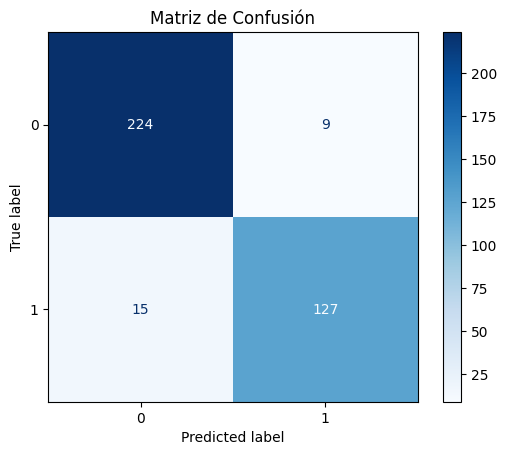

In [17]:
plt.figure(figsize=(10,10))
disp_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_xgb))
disp_cm.plot(cmap="Blues")
plt.title("Matriz de Confusión");

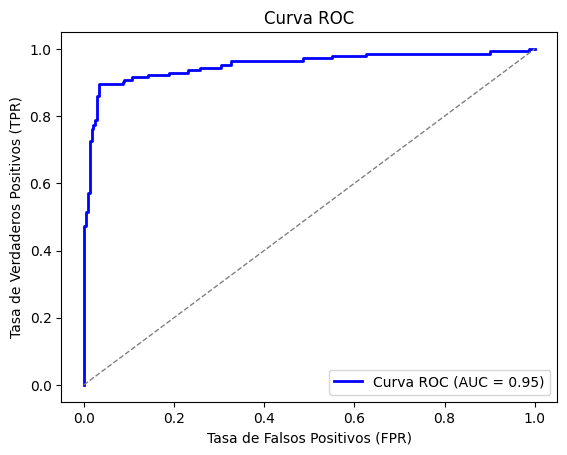

In [ ]:


y_probs = best_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"Curva ROC (AUC = {roc_auc:.2f})", lw=2, color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey", lw=1)
plt.title("Curva ROC")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.show()


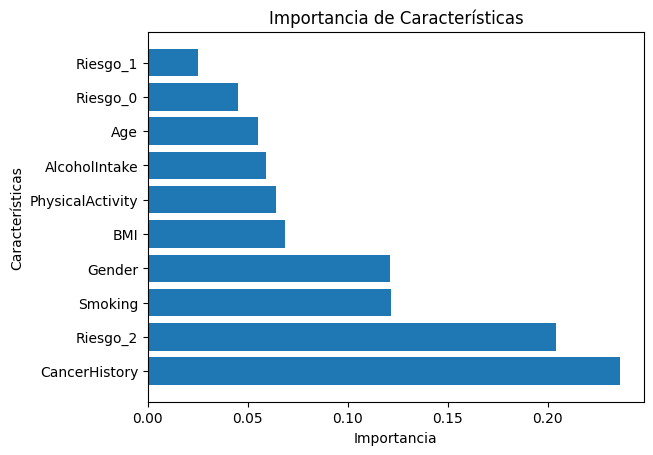

In [13]:
importances = best_xgb.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

plt.barh(range(len(importances)), importances[sorted_idx], align="center")
plt.yticks(range(len(importances)), [X_train.columns[i] for i in sorted_idx])
plt.title("Importancia de Características")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

In [ ]:
train_pred = best_xgb.predict(X_train)
test_pred = best_xgb.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Accuracy en Entrenamiento: {train_acc:.2f}")
print(f"Accuracy en Prueba: {test_acc:.2f}")

if abs(train_acc - test_acc) < 0.05:
    print("El modelo no sufre de overfitting ni underfitting.")
elif train_acc > test_acc:
    print("El modelo podría estar sufriendo de overfitting.")
else:
    print("El modelo podría estar sufriendo de underfitting.")


Accuracy en Entrenamiento: 0.98
Accuracy en Prueba: 0.94
El modelo no sufre de overfitting ni underfitting.


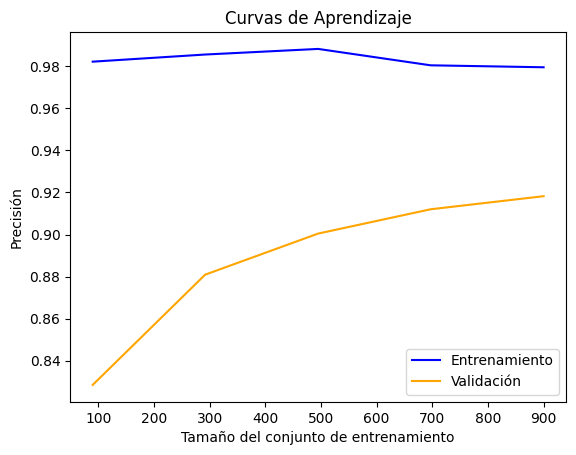

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    best_xgb, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Entrenamiento", color="blue")
plt.plot(train_sizes, test_mean, label="Validación", color="orange")
plt.title("Curvas de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.show()